# Week1 LAB: Bayesian Belief Update

In [4]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

## Case1: Beta-Bonimal (unknown p)

In [5]:
from scipy.stats import binom, beta

### Sampling Density

Every statistical inference or prediction should always start first with the assumption on sampling density, i.e. data generating process. In this case, we have a data set from a classical coin toss , yi∈{0,1} , where yi=1 with a probability p, and our goal is to make Bayesian inference on the parameter p

In [6]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


### Prior Belief

Prior belief can be in any form(flat, peaked, skewed, bimodal...) as long as the belief satisfies the fundamental axioms of probability. We choose beta distribution to express our belief solely because of its analytic convenience, that is, the resulting posterior can be integrated.

Text(0, 0.5, 'p(theta)')

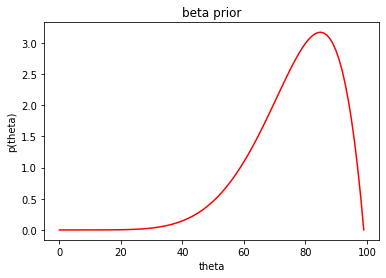

In [7]:
# choose your belief parameter
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

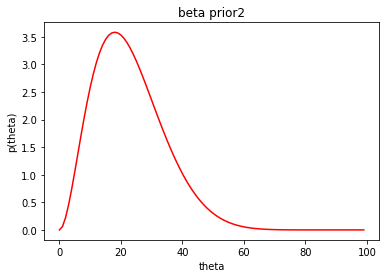

In [8]:
# you can always reflect other belief by tweaking your parameter;
a2= 3; b2= 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

### Likelihood (Sampling distribution)

Once you have specified your belief, you need to consider  "how likely"  the data is at each point of  p . What you would really come in handy is a plot where every possible choice of  p  is on x-axis and the y-axis shows "how likely the data came from that choice of  p . Likelihood does exactly this.

(0, 0.0005)

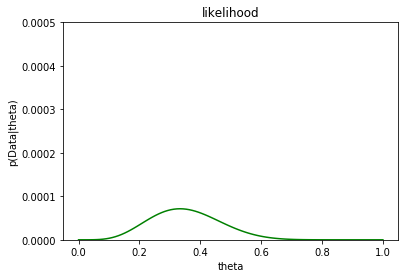

In [9]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc) # note that we neglected the constant as it will be canceled out in appling Bayes Rule

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

### Posterior: Updated Belief

The posterior is defined by strictly applying Bayes Rule; $ p(θ|D)= \frac{p(θ)p(D|θ)}{∫p(θ)p(D|θ)dθ} $. This is in most cases analytically intractable, but in this case where we have a __conjugacy__  between the belief distribution and the sampling distribution, this simply reduces to updating belief paratemers; a, b. Otherwise we have to approximate  $ p(θ|D) $ or use numerical methods, such as MCMC.

Text(0, 0.5, 'p(theta)')

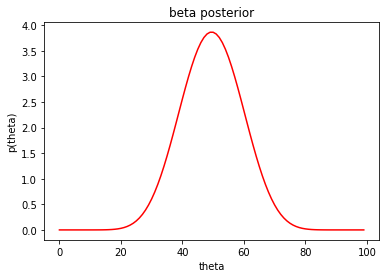

In [10]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0, 4)

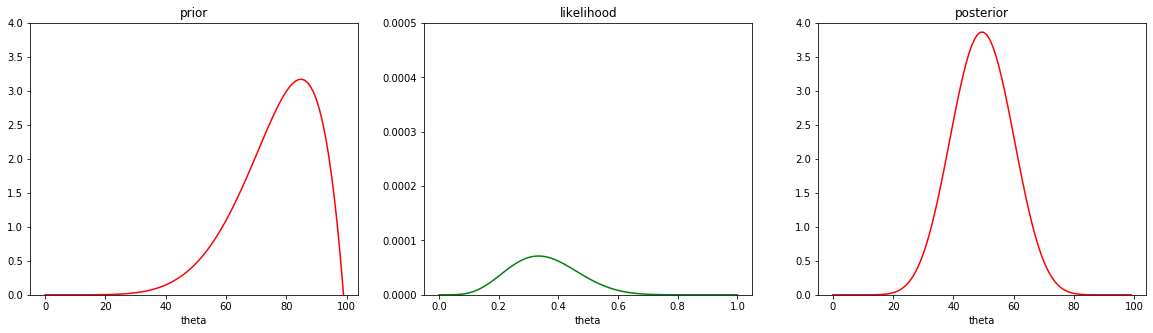

In [11]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

---

# [HW] Case 2: Gaussian-Gaussian (unknown mu)

In [12]:
from scipy.stats import norm

### Prior Belief (mu = 15, lmda_mu = 0.1)

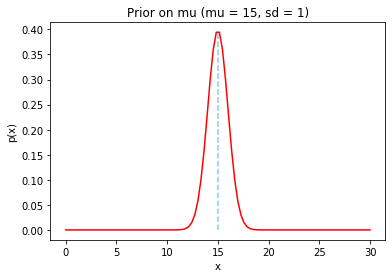

In [13]:
# choose your belief parameter
mu_x= 15; sd_x= 1

rv = norm(mu_x, sd_x)
xx = np.linspace(0, 30, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf, color='r')
plt.vlines(mu_x, ymin=0, ymax=np.max(pdf), colors='skyblue', linestyles='dashed')
plt.title('Prior on mu (mu = %d, sd = %d)' %(mu_x, sd_x))
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

### Likelihood (Gaussian)

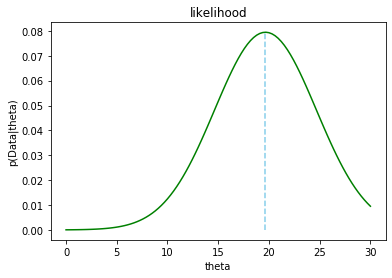

In [23]:
#y는 평균이 20이고, 분산이 5인 정규분포에서 총 100개의 데이터를 얻었다고 하자.
n = 100
mu_y = 20; sd_y = 5

# 이때 우리가 가지고 있는 100개의 데이터를 아래와 같다고 하자.
np.random.seed(202)
data = sorted(np.random.normal(mu_y, sd_y, n))

# 실제 데이터를 기준으로 mu_y와 sd_y를 업데이트
mu_y = np.mean(data)
sd_y = np.std(data)

rv_y = norm(mu_y, sd_y)
yy = np.linspace(0, 30, 100)
pdf_y = rv_y.pdf(yy)
#a = np.random.normal(loc=mu_y, scale=var_y, size=n)
plt.plot(yy, pdf_y, color='g')
plt.vlines(mu_y, ymin=0, ymax=np.max(pdf_y), colors='skyblue', linestyles='dashed')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
#plt.title('Likelihood from (mu = %d, var = %d) with size %d' %(mu_y, var_y, n))
#plt.xlabel('x')
#plt.ylabel('p(x)')
plt.show()

#이는 완벽한 likelihood 그래프는 아니다.

In [24]:
# 데이터 확인해보기
print(np.mean(data))
print(np.std(data))

19.65683298795351
5.02084007625514


### Posterior: Updated Belief

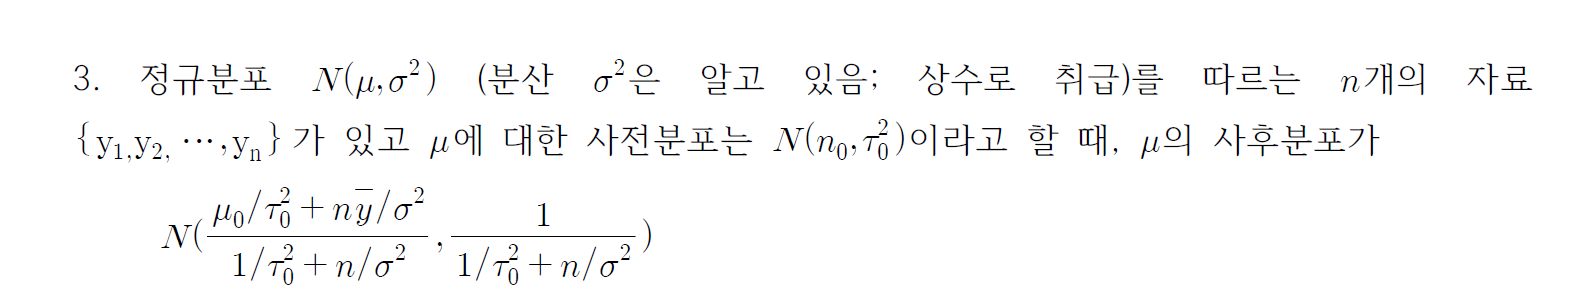

* 2019-2 베이즈통계 수업 HW 중 나온 내용

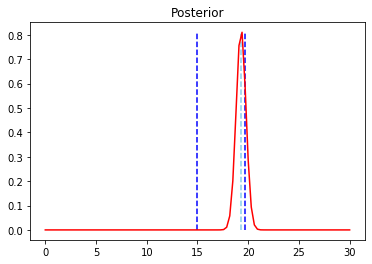

In [25]:
var_x = sd_x^2
post_mu = (mu_x/var_x + n*np.mean(data)/np.var(data))/(1/var_x + n/np.var(data))
post_var = 1 / (1/var_x + n/np.var(data))
post_sd = np.sqrt(post_var)

rv_post = norm(post_mu, post_sd)
post_x = np.linspace(0, 30, 100)
pdf_post = rv_post.pdf(post_x)
plt.plot(post_x, pdf_post, color='r')
plt.vlines(post_mu, ymin=0, ymax=np.max(pdf_post), colors='skyblue', linestyles='dashed')
plt.vlines(mu_x, ymin=0, ymax=np.max(pdf_post), colors='b', linestyles='dashed')
plt.vlines(mu_y, ymin=0, ymax=np.max(pdf_post), colors='b', linestyles='dashed')
plt.title('Posterior')
plt.show()

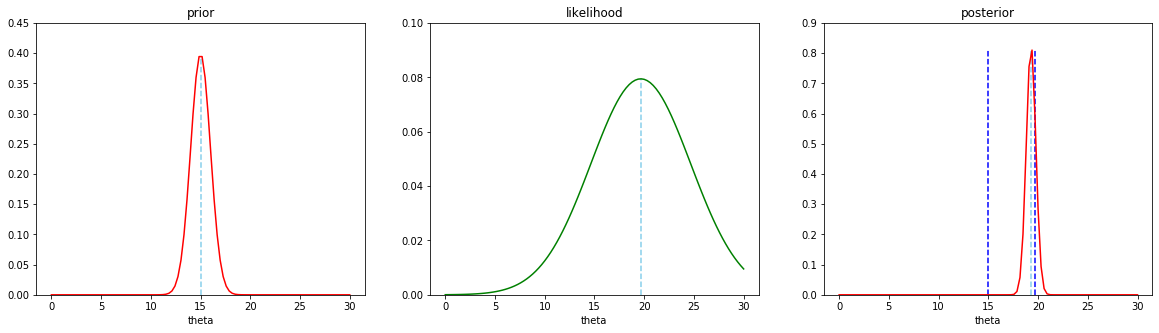

In [26]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(xx, pdf, color='r')
ax1.vlines(mu_x, ymin=0, ymax=np.max(pdf), colors='skyblue', linestyles='dashed')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,0.45)

ax2 = fig.add_subplot(132)
ax2.plot(yy, pdf_y, color='g')
ax2.vlines(mu_y, ymin=0, ymax=np.max(pdf_y), colors='skyblue', linestyles='dashed')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.1)

ax3 = fig.add_subplot(133)
ax3.plot(post_x, pdf_post, color='r')
ax3.vlines(post_mu, ymin=0, ymax=np.max(pdf_post), colors='skyblue', linestyles='dashed')
ax3.vlines(mu_x, ymin=0, ymax=np.max(pdf_post), colors='b', linestyles='dashed')
ax3.vlines(mu_y, ymin=0, ymax=np.max(pdf_post), colors='b', linestyles='dashed')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,0.9)
plt.show()